### Exploratory Data Analysis

#### libraries

In [29]:
import os

import shutil
import keras
import random
import keras_cv
import warnings
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score
from keras.utils import image_dataset_from_directory

In [30]:
warnings.filterwarnings("ignore")

In [31]:
# Reproducability
tf.keras.utils.set_random_seed(69)

#### viewing directory

In [32]:
waste_type_dir = []

for (root, dirs, files) in os.walk('waste-images'):
    waste_type_dir.append(root)

waste_type_dir
        

['waste-images',
 'waste-images/disposable_plastic_cutlery',
 'waste-images/food_waste',
 'waste-images/office_paper',
 'waste-images/glass_food_jars',
 'waste-images/aluminum_soda_cans',
 'waste-images/magazines',
 'waste-images/clothing',
 'waste-images/plastic_shopping_bags',
 'waste-images/plastic_soda_bottles',
 'waste-images/styrofoam_food_containers',
 'waste-images/aerosol_cans',
 'waste-images/aluminum_food_cans',
 'waste-images/newspaper',
 'waste-images/eggshells',
 'waste-images/glass_cosmetic_containers',
 'waste-images/paper_cups',
 'waste-images/plastic_water_bottles',
 'waste-images/coffee_grounds',
 'waste-images/steel_food_cans',
 'waste-images/plastic_cup_lids',
 'waste-images/cardboard_packaging',
 'waste-images/cardboard_boxes',
 'waste-images/plastic_straws',
 'waste-images/styrofoam_cups',
 'waste-images/glass_beverage_bottles',
 'waste-images/shoes',
 'waste-images/plastic_trash_bags',
 'waste-images/tea_bags',
 'waste-images/plastic_food_containers',
 'waste-im

In [33]:
waste_type_dir = waste_type_dir[1:]

In [34]:
print(waste_type_dir)

['waste-images/disposable_plastic_cutlery', 'waste-images/food_waste', 'waste-images/office_paper', 'waste-images/glass_food_jars', 'waste-images/aluminum_soda_cans', 'waste-images/magazines', 'waste-images/clothing', 'waste-images/plastic_shopping_bags', 'waste-images/plastic_soda_bottles', 'waste-images/styrofoam_food_containers', 'waste-images/aerosol_cans', 'waste-images/aluminum_food_cans', 'waste-images/newspaper', 'waste-images/eggshells', 'waste-images/glass_cosmetic_containers', 'waste-images/paper_cups', 'waste-images/plastic_water_bottles', 'waste-images/coffee_grounds', 'waste-images/steel_food_cans', 'waste-images/plastic_cup_lids', 'waste-images/cardboard_packaging', 'waste-images/cardboard_boxes', 'waste-images/plastic_straws', 'waste-images/styrofoam_cups', 'waste-images/glass_beverage_bottles', 'waste-images/shoes', 'waste-images/plastic_trash_bags', 'waste-images/tea_bags', 'waste-images/plastic_food_containers', 'waste-images/plastic_detergent_bottles']


In [7]:
# # restructuring directory
# # Define the working directory (where images are stored)
# working_directory = "waste-images\\images\\images"

# # Define the base directory where categories will be moved to
# base_directory = "waste-images"

# # Iterate through each category folder under the 'images/images' directory
# for category in os.listdir(working_directory):
#     category_path = os.path.join(working_directory, category)
    
#     # Check if it's a directory (should be the category folder)
#     if os.path.isdir(category_path):
        
#         # Create the category folder in the base directory if it doesn't exist
#         new_category_path = os.path.join(base_directory, category)
#         os.makedirs(new_category_path, exist_ok=True)

#         # Iterate through 'default' and 'real_world' subdirectories inside each category
#         for subfolder in ['default', 'real_world']:
#             subfolder_path = os.path.join(category_path, subfolder)
            
#             # Check if the subfolder exists
#             if os.path.exists(subfolder_path):
#                 # Iterate through all image files in the subfolder
#                 for img_file in os.listdir(subfolder_path):
#                     img_path = os.path.join(subfolder_path, img_file)
                    
#                     # Define the new file path in the base category directory
#                     new_img_path = os.path.join(new_category_path, f"{subfolder}_{img_file}")
                    
#                     # Copy the file to the new category directory
#                     shutil.copy(img_path, new_img_path)
                    
#                     # Optionally, you can delete the original file after copying
#                     os.remove(img_path)
                
#                 # After copying, you can remove the empty subdirectory (if you want to clean up)
#                 os.rmdir(subfolder_path)

# print("Images successfully moved and subdirectories cleaned.")

In [8]:
# # Function to count images per subfolder
# def count_images_per_folder(waste_type_dir):
#     for category_path in waste_type_dir:
#         category_name = os.path.basename(category_path)  # Extract category name
#         print(f"Category: {category_name}")

#         # Check for "default" and "real_world" subfolders
#         default_path = os.path.join(category_path, "default")
#         real_world_path = os.path.join(category_path, "real_world")

#         if not os.path.exists(default_path) or not os.path.exists(real_world_path):
#             print(f"  Missing subfolders in {category_name}. Expected 'default' and 'real_world'.")
#             continue

#         # Count images in each subfolder
#         default_images = len([f for f in os.listdir(default_path) if os.path.isfile(os.path.join(default_path, f))])
#         real_world_images = len([f for f in os.listdir(real_world_path) if os.path.isfile(os.path.join(real_world_path, f))])

#         # Output results
#         print(f"  Default: {default_images} images")
#         print(f"  Real World: {real_world_images} images")

#         # Verify expected count
#         if default_images != 250 or real_world_images != 250:
#             print(f"  WARNING: Expected 250 images in each folder, but found {default_images} (default) and {real_world_images} (real_world).")

# # Run the function
# count_images_per_folder(waste_type_dir)


### Assumption: All materials are food and beverage free
Also..talk about liquid disposal fountain next to the trash

In [36]:
food_waste = ['coffee_grounds','eggshells', 'food_waste', 'tea_bags']
mixed_recycle = ['aluminum_food_cans', 'aluminum_soda_cans', 'aerosol_cans', 'cardboard_boxes', 'cardboard_packaging','glass_beverage_bottles', 'glass_cosmetic_containers', 'glass_food_jars', 'magazines', 'newspaper', 'office_paper', 'plastic_detergent_bottles', 'plastic_food_containers', 'plastic_soda_bottles', 'plastic_water_bottles','steel_food_cans']
trash = ['clothes','styrofoam_cups', 'styrofoam_food_containers', 'disposable_plastic_cutlery', 'paper_cups', 'paper_cup_lids', 'plastic_shopping_bags','plastic_straws', 'plastic_trash_bags', 'shoes' ]

In [37]:
if len(food_waste) + len(mixed_recycle) + len(trash) == len(waste_type_dir):
    print("All categories included!")

All categories included!


In [38]:
# Function to map materials to their directories
def map_to_directories(materials, directories):
    return [dir_path for dir_path in directories if dir_path.split('/')[-1] in materials]

# Map each list to directories
food_waste_dirs = map_to_directories(food_waste, waste_type_dir)
mixed_recycle_dirs = map_to_directories(mixed_recycle, waste_type_dir)
trash_dirs = map_to_directories(trash, waste_type_dir)

# Print results
print("Food Waste Directories:", food_waste_dirs)
print("Mixed Recycle Directories:", mixed_recycle_dirs)
print("Trash Directories:", trash_dirs)

Food Waste Directories: ['waste-images/food_waste', 'waste-images/eggshells', 'waste-images/coffee_grounds', 'waste-images/tea_bags']
Mixed Recycle Directories: ['waste-images/office_paper', 'waste-images/glass_food_jars', 'waste-images/aluminum_soda_cans', 'waste-images/magazines', 'waste-images/plastic_soda_bottles', 'waste-images/aerosol_cans', 'waste-images/aluminum_food_cans', 'waste-images/newspaper', 'waste-images/glass_cosmetic_containers', 'waste-images/plastic_water_bottles', 'waste-images/steel_food_cans', 'waste-images/cardboard_packaging', 'waste-images/cardboard_boxes', 'waste-images/glass_beverage_bottles', 'waste-images/plastic_food_containers', 'waste-images/plastic_detergent_bottles']
Trash Directories: ['waste-images/disposable_plastic_cutlery', 'waste-images/plastic_shopping_bags', 'waste-images/styrofoam_food_containers', 'waste-images/paper_cups', 'waste-images/plastic_straws', 'waste-images/styrofoam_cups', 'waste-images/shoes', 'waste-images/plastic_trash_bags']

In [39]:
# verify if all categories' working directory was matched
print("Food Waste: ", len(food_waste_dirs)==len(food_waste))
print("Mixed Recycling: ", len(mixed_recycle_dirs)==len(mixed_recycle))
print("Trash: ", len(trash_dirs)==len(trash_dirs))

Food Waste:  True
Mixed Recycling:  True
Trash:  True


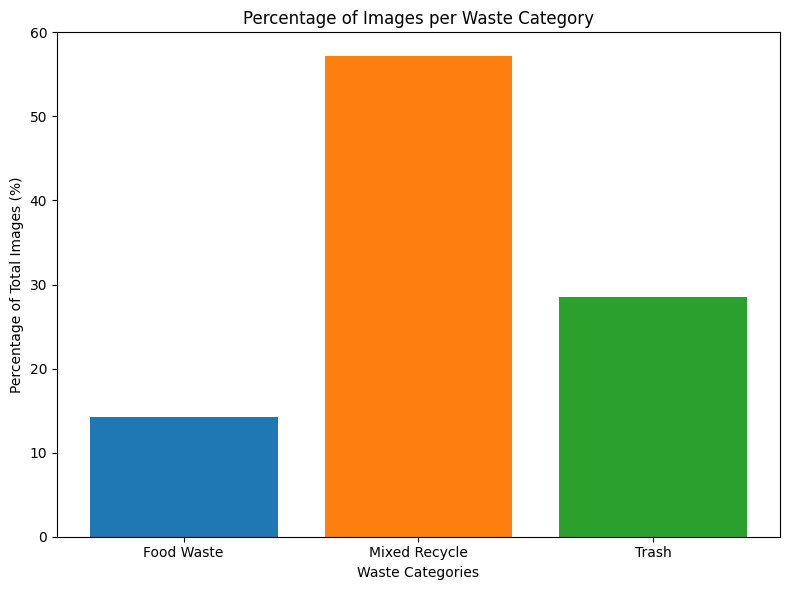

In [40]:
# Function to count total images in default and real_world subdirectories for a category
def count_total_images(category_dirs):
    total_images = 0
    for dir_path in category_dirs:

        # Count images in default and real_world subdirectories
        default_count = len([f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]) if os.path.exists(dir_path) else 0
        # Add to total count
        total_images += (default_count)
    return total_images

# Calculate total image counts for each category
food_waste_total = count_total_images(food_waste_dirs)
mixed_recycle_total = count_total_images(mixed_recycle_dirs)
trash_total = count_total_images(trash_dirs)

# Calculate total images across all categories
overall_total = food_waste_total + mixed_recycle_total + trash_total

# Calculate percentages
categories = ['Food Waste', 'Mixed Recycle', 'Trash']
percentages = [
    (food_waste_total / overall_total) * 100,
    (mixed_recycle_total / overall_total) * 100,
    (trash_total / overall_total) * 100
]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Waste Categories')
plt.ylabel('Percentage of Total Images (%)')
plt.title('Percentage of Images per Waste Category')
plt.tight_layout()
plt.show()

### Using GANs to Create Synthetic Food Waste Images 

In [41]:
#preprocess data 
coffee_grounds_path = food_waste_dirs[0]

image_size = (64,64)
images = []

for img_file in os.listdir(coffee_grounds_path):
    img_path = os.path.join(coffee_grounds_path, img_file)
    img = Image.open(img_path).convert("RGB")  # Ensure all images have 3 channels (RGB)
    img = img.resize(image_size)  # Resize to target size
    images.append(np.array(img))

# Convert to a NumPy array
images = np.array(images)

In [42]:
# Preprocessing function to load and resize images
def load_images_from_dirs(dirs, image_size=(64, 64)):
    images = []
    for dir_path in dirs:
        for img_file in os.listdir(dir_path):
            img_path = os.path.join(dir_path, img_file)
            try:
                img = Image.open(img_path).convert("RGB")  # Ensure all images are RGB
                img = img.resize(image_size)  # Resize to target size
                images.append(np.array(img))
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    return np.array(images)
# Load images for each category
food_waste_images = load_images_from_dirs(food_waste_dirs)
mixed_recycle_images = load_images_from_dirs(mixed_recycle_dirs)
trash_images = load_images_from_dirs(trash_dirs)

# Normalize image data (-1 to 1 range) because we are using Tanh activation in the last layer of the model
food_waste_images = (food_waste_images / 127.5) - 1.0
mixed_recycle_images = (mixed_recycle_images / 127.5) - 1.0
trash_images = (trash_images / 127.5) - 1.0




In [43]:
print(f"Food Waste Images Shape: {food_waste_images.shape}, dtype: {food_waste_images.dtype}")


Food Waste Images Shape: (2000, 64, 64, 3), dtype: float64


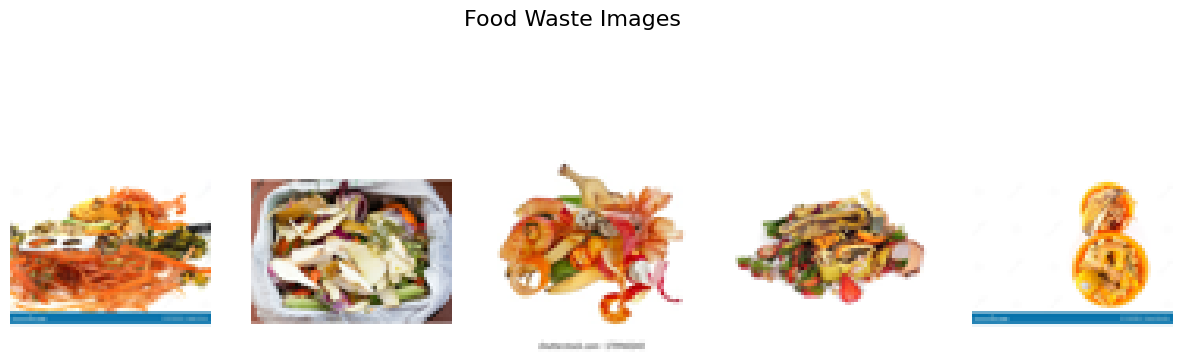

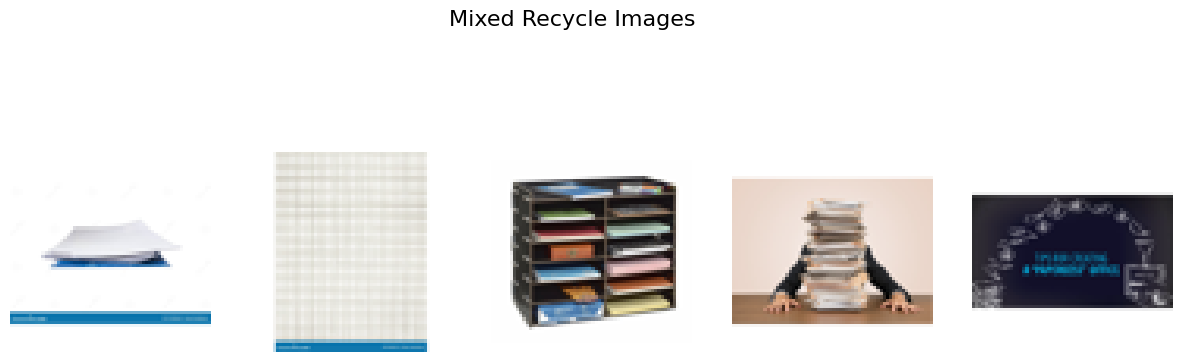

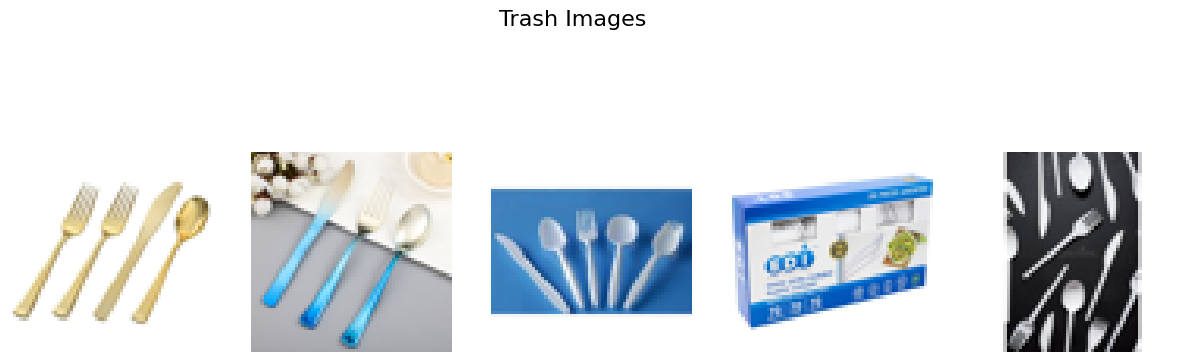

In [17]:
import matplotlib.pyplot as plt

# Function to display images
def show_images(images, title, n=5):
    plt.figure(figsize=(15, 5))
    for i in range(min(n, len(images))):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

# Show some images from each category
show_images(food_waste_images, "Food Waste Images")
show_images(mixed_recycle_images, "Mixed Recycle Images")
show_images(trash_images, "Trash Images")


# GAN Architecture: 
* Generator: 
    * What It Does: Generates synthetic images from random noise.
    * Purpose: Learns to create images that are indistinguishable from real ones.
    * Why It's Important: Produces new data for augmentation, which helps balance your dataset.Takes random noise as input and generates images.
* Discriminator: Takes real or generated images as input and predicts whether they are real or fake.
    * What It Does: Classifies images as real or fake.
    * Purpose: Helps the generator improve its ability to produce realistic images.
    * Why It's Important: Provides feedback to the generator, guiding it towards producing better images.
* GAN: Combines the generator and discriminator to train the generator to produce more realistic images.


In [ ]:
# GAN architecture 
from tensorflow.keras import layers, Sequential


def build_generator(latent_dim):
    model = tf.keras.Sequential([
        layers.Dense(128 * 16 * 16, activation="relu", input_dim=latent_dim),  # Adjust size
        layers.Reshape((16, 16, 128)),  # Adjust to (16, 16, 128)
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same", activation="relu"),  # Upsample to (32, 32, 128)
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same", activation="relu"),  # Upsample to (64, 64, 128)
        layers.Conv2D(3, kernel_size=7, activation="tanh", padding="same")  # Final output (64, 64, 3)
    ])
    return model



def build_discriminator(image_shape):
    model = Sequential([
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same", input_shape=image_shape),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid")  # Binary classification (real/fake)
    ])
    return model


In [45]:
latent_dim = 100
generator = build_generator(latent_dim)
test_noise = tf.random.normal([1, latent_dim])  # Single random noise vector
generated_image = generator(test_noise)
print(f"Generator output shape: {generated_image.shape}")


Generator output shape: (1, 64, 64, 3)


This step combines the Generator and Discriminator into a complete GAN system so that the Generator can learn through feedback from the Discriminator.
* Frozen Discriminator: During GAN training, the discriminator's weights are "frozen" (non-trainable). This ensures that only the generator is updated during this phase. The discriminator indirectly trains the generator by providing signals on how well it is "fooling" it.

In [46]:


import tensorflow as tf

latent_dim = 100  # Size of noise vector
image_shape = (64, 64, 3)  # Image dimensions

# Instantiate models
generator = build_generator(latent_dim)
discriminator = build_discriminator(image_shape)

# Compile discriminator
discriminator.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Build and compile GAN
discriminator.trainable = False  # Freeze discriminator weights for GAN training
gan_input = layers.Input(shape=(latent_dim,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(optimizer="adam", loss="binary_crossentropy")


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32768)          │     3,309,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_6              │ (None, 32, 32, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 64, 64, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 3)      │        18,819 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,852,931 (14.70 MB)

 Trainable params: 3,852,931 (14.70 MB)

 Non-trainable params: 0 (0.00 B)

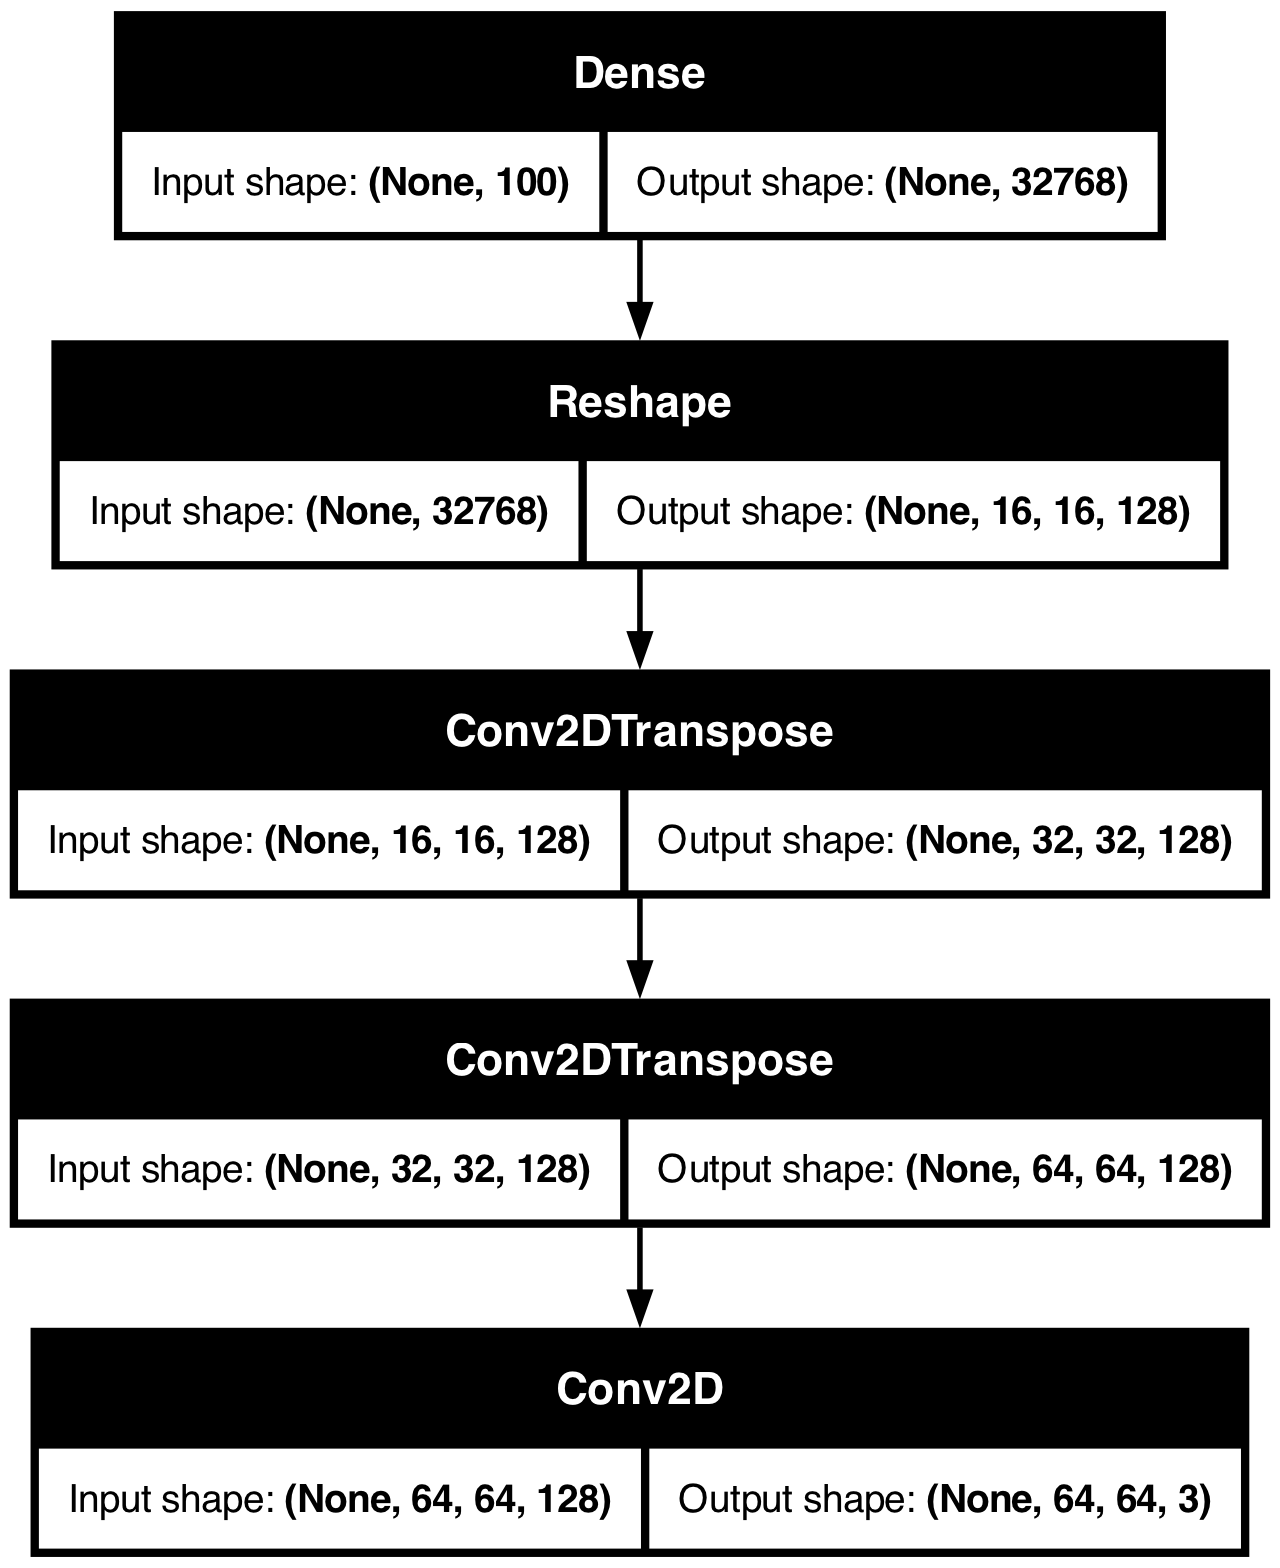

In [47]:
generator.summary()  # Prints a textual summary of the generator model
tf.keras.utils.plot_model(generator, show_shapes=True, to_file="generator_architecture.png")


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │        32,769 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,105 (652.75 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 167,105 (652.75 KB)

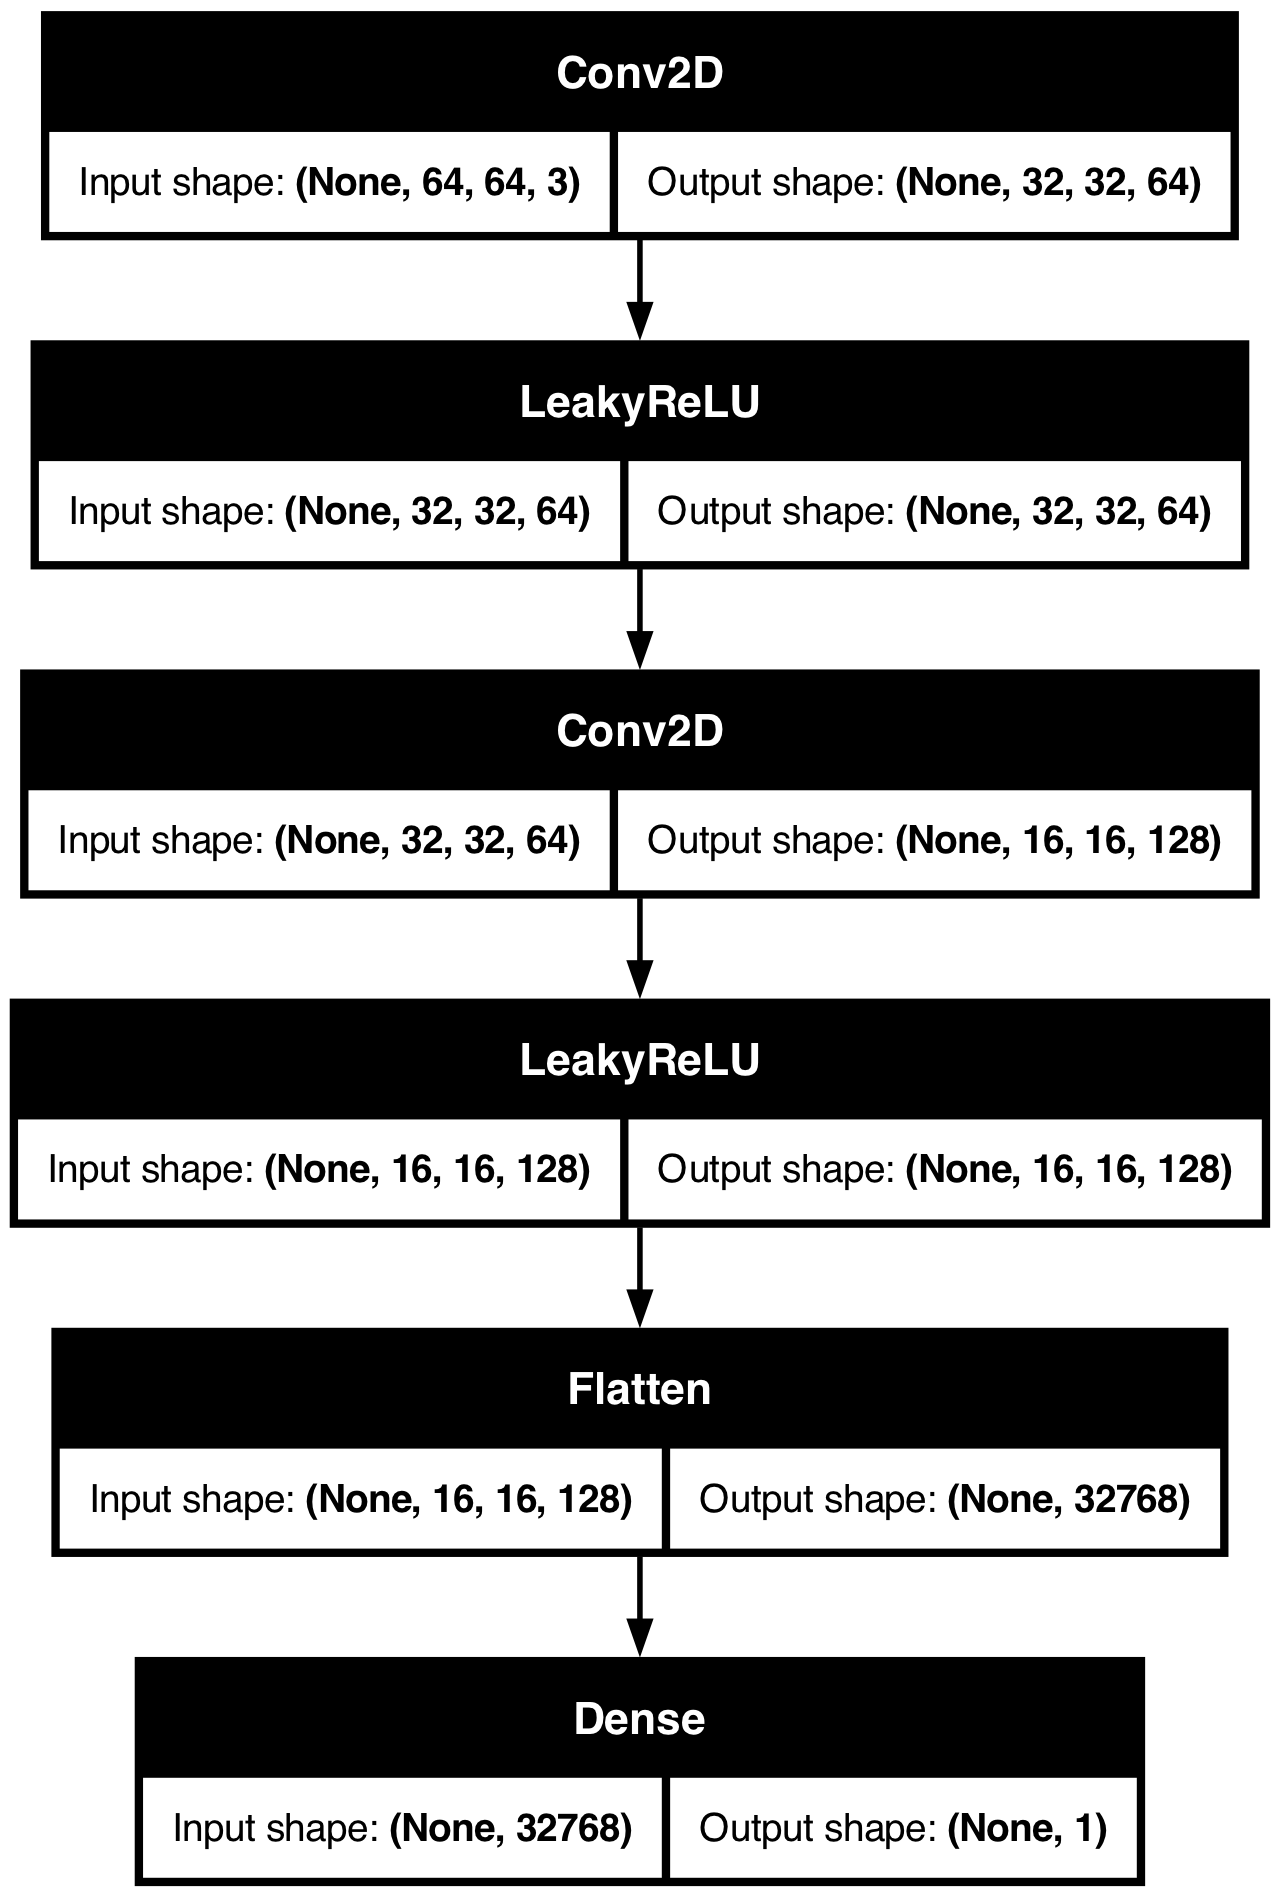

In [48]:
discriminator.summary()  # Prints a textual summary of the discriminator model
tf.keras.utils.plot_model(discriminator, show_shapes=True, to_file="discriminator_architecture.png")


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 64, 64, 3)      │     3,852,931 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (None, 1)              │       167,105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,020,036 (15.34 MB)

 Trainable params: 3,852,931 (14.70 MB)

 Non-trainable params: 167,105 (652.75 KB)

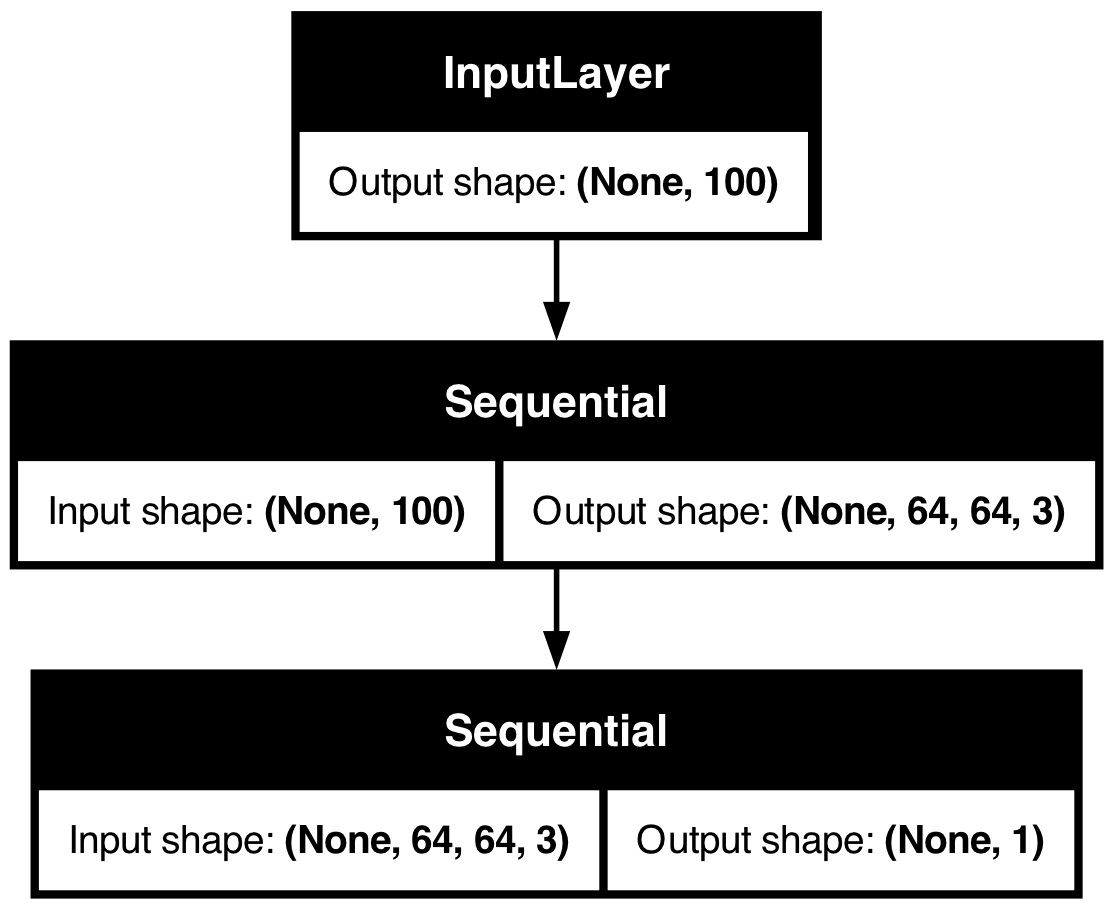

In [49]:
gan.summary()  # Prints a textual summary of the GAN model
tf.keras.utils.plot_model(gan, show_shapes=True, to_file="gan_architecture.png")


Training a GAN involves a balance between improving both the Generator and the Discriminator. Here's how this happens:
* Step 1: Train the Discriminator
    * Goal: Make the discriminator better at distinguishing real images from fake images.
    * Process:
        * Select a batch of real images from the dataset.
        * Generate a batch of fake images using the generator.
        * Train the discriminator on both:
        *Real images (label: 1)
Fake images (label: 0)
Loss Function: Binary cross-entropy, which evaluates how well the discriminator predicts the labels.
Step 2: Train the Generator (via the GAN model)
Goal: Make the generator produce more realistic images to "fool" the discriminator.
Process:
Generate random noise vectors.
Use the generator to create synthetic images.
Pass these images through the discriminator (via the GAN model).
Train the generator with a label of 1 (it tries to make the discriminator believe the fake images are real).
Why Is the Discriminator Frozen? The generator relies on the discriminator's feedback to improve, but we do not want the discriminator to learn during this step. The focus is solely on improving the generator.

In [50]:
food_waste_images.shape

(2000, 64, 64, 3)

In [ ]:
import numpy as np

def train_gan(generator, discriminator, gan, real_images, epochs=10000, batch_size=64):
    latent_dim = generator.input_shape[1]
    half_batch = batch_size // 2

    for epoch in range(epochs):
        try:
            # Train discriminator
            idx = np.random.randint(0, real_images.shape[0], half_batch)
            real_samples = real_images[idx]
            noise = np.random.normal(0, 1, (half_batch, latent_dim))
            fake_samples = generator.predict(noise)
            real_labels = np.ones((half_batch, 1))
            fake_labels = np.zeros((half_batch, 1))

            # Debugging shapes
            print(f"Epoch {epoch}: Real {real_samples.shape}, Fake {fake_samples.shape}")
            print(f"Real labels: {real_labels.shape}, Fake labels: {fake_labels.shape}")

            d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
            d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)

            # Train generator (via GAN model)
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            misleading_labels = np.ones((batch_size, 1))
            g_loss = gan.train_on_batch(noise, misleading_labels)

            # Print progress every 100 epochs
            if epoch % 100 == 0:
                print(f"Epoch {epoch} | D Loss: {d_loss_real[0] + d_loss_fake[0]} | G Loss: {g_loss}")
        except Exception as e:
            print(f"Error at epoch {epoch}: {e}")

# Train GAN using food waste images
train_gan(generator, discriminator, gan, food_waste_images, epochs=5000, batch_size=32)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Epoch 0: Real (16, 64, 64, 3), Fake (16, 64, 64, 3)
Real labels: (16, 1), Fake labels: (16, 1)
Error at epoch 0: 'NoneType' object has no attribute 'update_state'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Epoch 1: Real (16, 64, 64, 3), Fake (16, 64, 64, 3)
Real labels: (16, 1), Fake labels: (16, 1)
Error at epoch 1: 'NoneType' object has no attribute 'update_state'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Epoch 2: Real (16, 64, 64, 3), Fake (16, 64, 64, 3)
Real labels: (16, 1), Fake labels: (16, 1)
Error at epoch 2: 'NoneType' object has no attribute 'update_state'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Epoch 3: Real (16, 64, 64, 3), Fake (16, 64, 64, 3)
Real labels: (16, 1), Fake labels: (16, 1)
Error at epoch 3: 'NoneType' object has no attribute 'update_state'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Epoch 4: Real (16, 64, 64, 3), Fake (16, 64, 64, 3)
Real labels: (16, 1), Fake labels: (16, 1)
Error at epoch 4: 'NoneType' object has no attribute 'upda

KeyboardInterrupt: 

In [ ]:
# Generate synthetic images
noise = np.random.normal(0, 1, (10, latent_dim))  # Generate 10 samples
synthetic_images = generator.predict(noise)

# Save generated images
for i, img in enumerate(synthetic_images):
    img = (img * 255).astype(np.uint8)  # Rescale to 0-255
    Image.fromarray(img).save(f"synthetic_image_{i}.png")


In [ ]:
# Generate synthetic images
noise = np.random.normal(0, 1, (10, latent_dim))  # Generate 10 samples
synthetic_images = generator.predict(noise)

# Save generated images
for i, img in enumerate(synthetic_images):
    img = (img * 255).astype(np.uint8)  # Rescale to 0-255
    Image.fromarray(img).save(f"synthetic_image_{i}.png")
